In [1]:
# load dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
path = (r"C:\Users\Olegi Megi\Desktop\Dataanalytics\Projects\Python Projects\Machine Learning\Predicting House Prices\Predicting House Prices.csv")
df = pd.read_csv(path)
df_raw = df.copy()

In [3]:
# get an overview of the data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
# get the numerical cols
numerical_cols = df.select_dtypes(["float", "int"]).columns

# get the categorical cols
categorical_cols = df.select_dtypes("object").columns

print(f"These are the numerical columns:\n {', '.join(numerical_cols)}")
print()
print(f"These are the categorical columns:\n {', '.join(categorical_cols)}")

These are the numerical columns:
 price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated

These are the categorical columns:
 date, street, city, statezip, country


In [8]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [9]:
# clean the data
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()

0

## EDA 

In [11]:
# create function for visualizing the column and comparing it with the price
def create_figure(column, data, title):
    background = "#D0D3D4"

    fig = plt.figure(figsize=(14, 10), facecolor=background)
    gs = fig.add_gridspec(1, 2)
    
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])

    for ax in [ax0, ax1]:
        ax.set_facecolor(background)
    
    # get the valuecounts for the column
    sns.countplot(x=column, data=data, color="#F5B041", ax=ax0)
    
    # get the relation between the column and the target value price
    sns.scatterplot(x=column, y=data.price, data=data, color="#F5B041", ax=ax1)
    
    for ax in [ax0, ax1]:
        ax.grid(linestyle="-.", alpha=0.7)
    
    plt.suptitle(title, size = 25, weight="bold")
    
    plt.show()

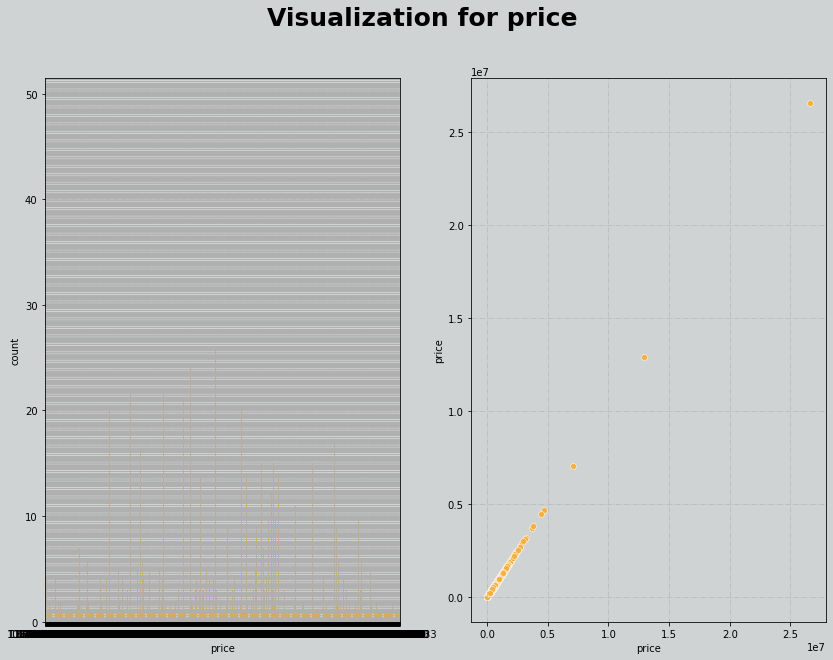

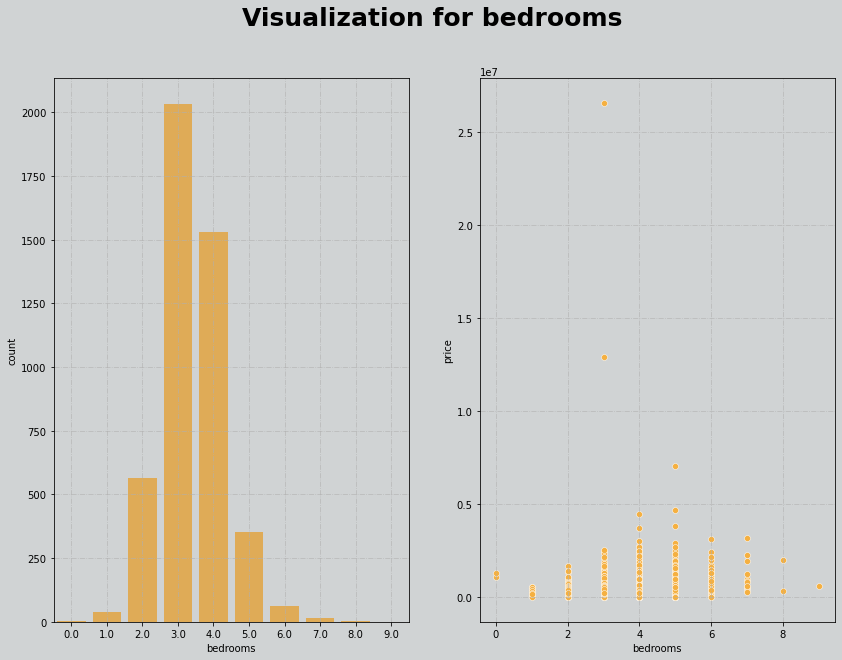

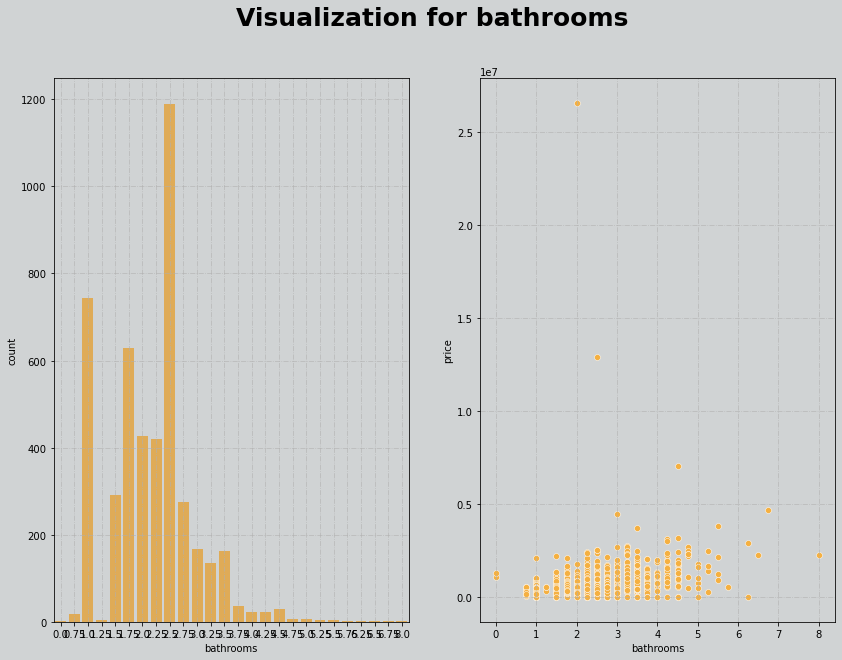

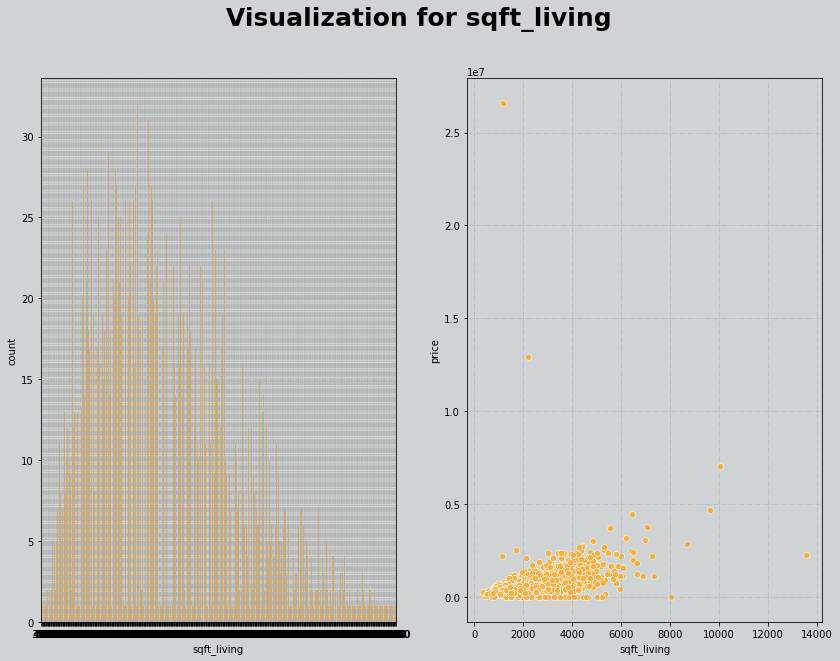

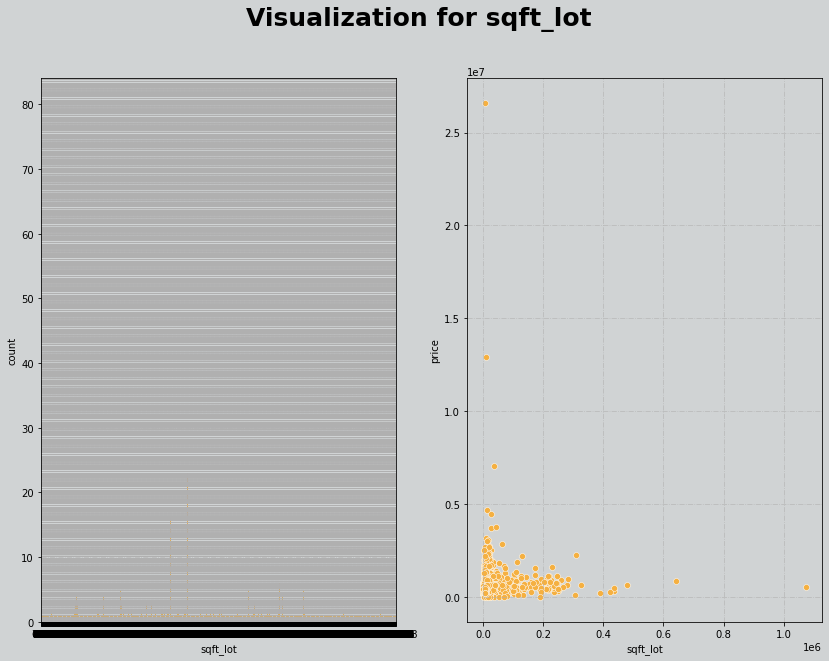

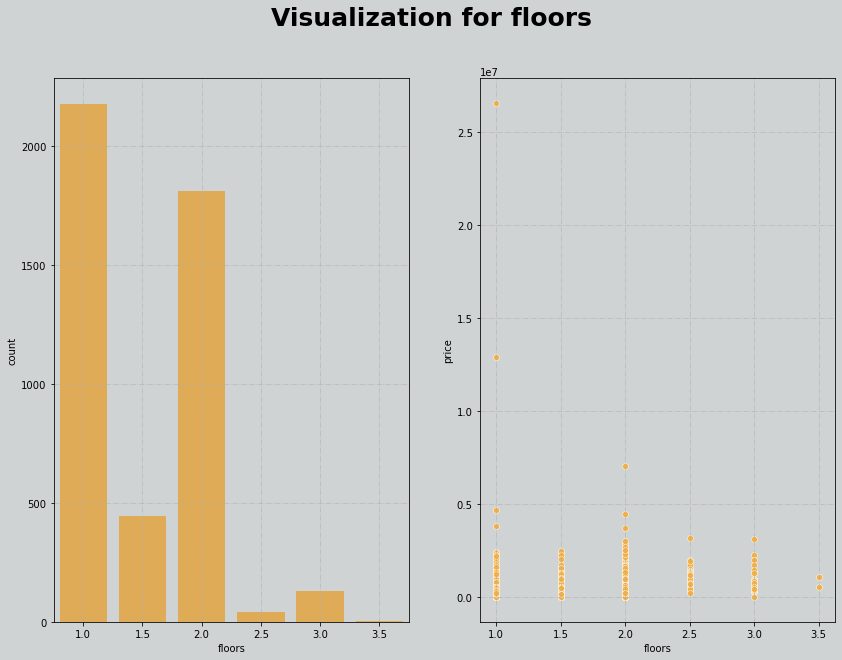

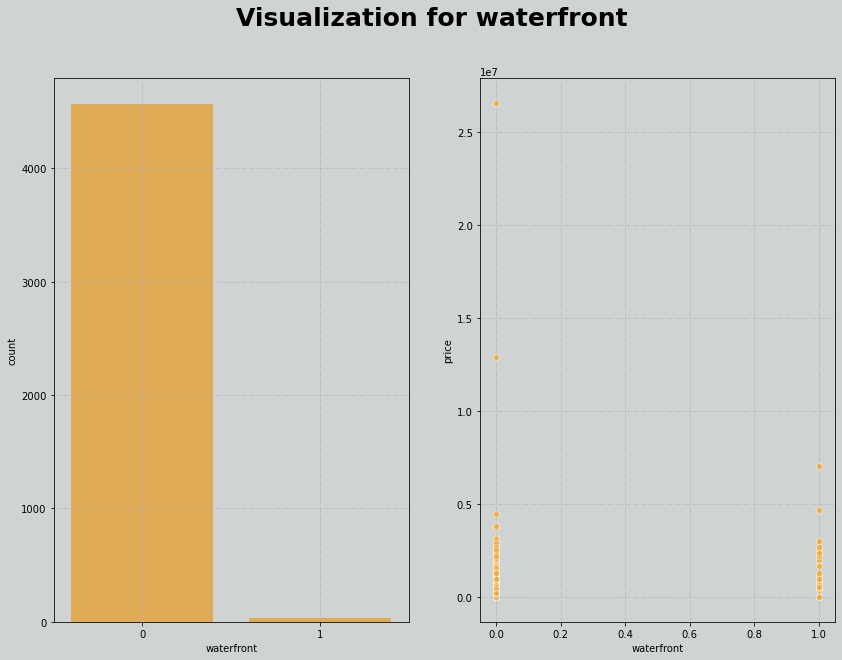

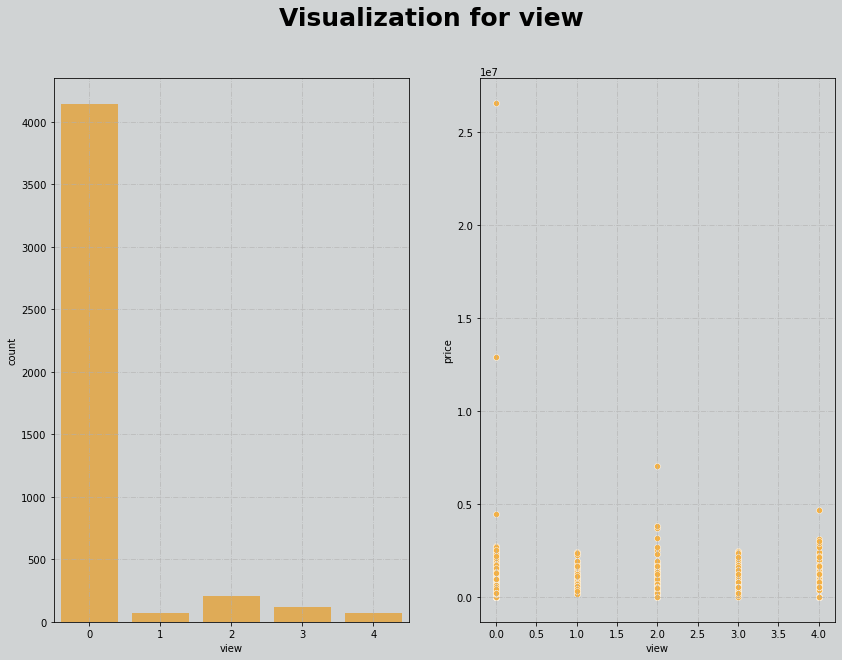

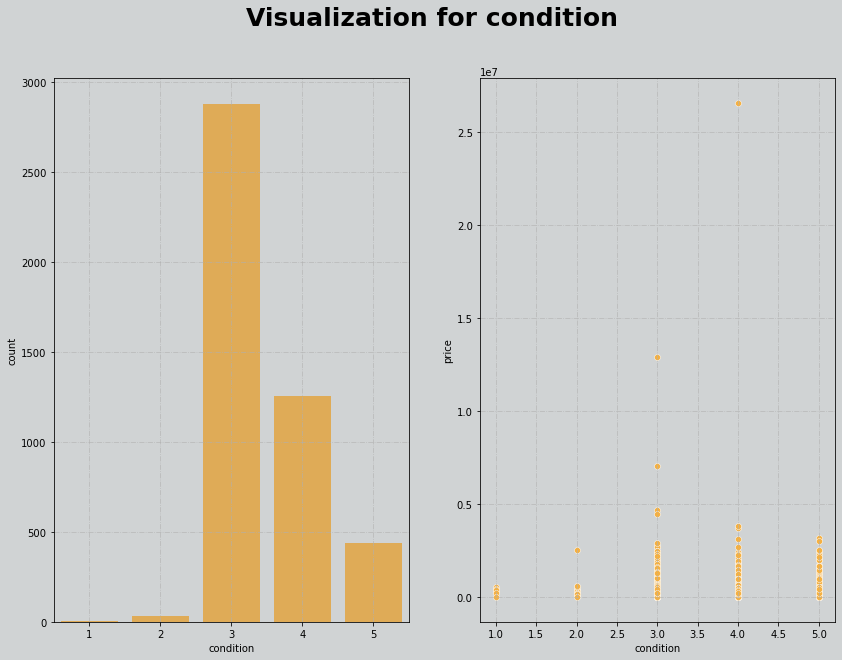

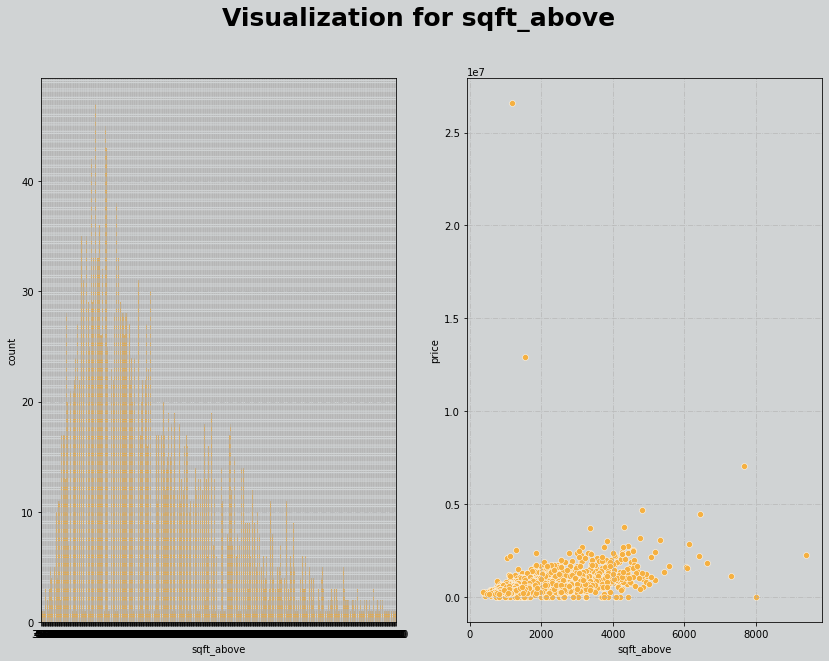

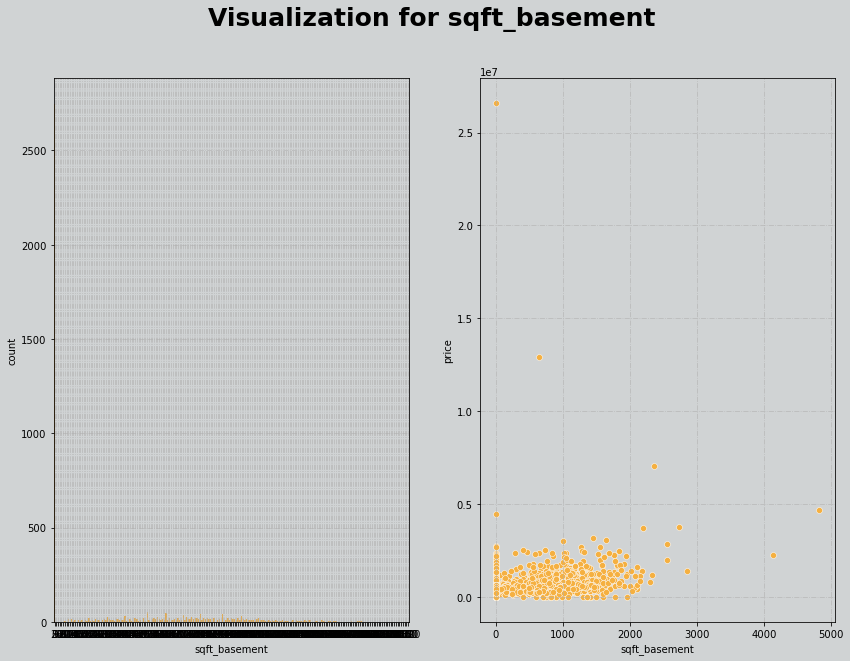

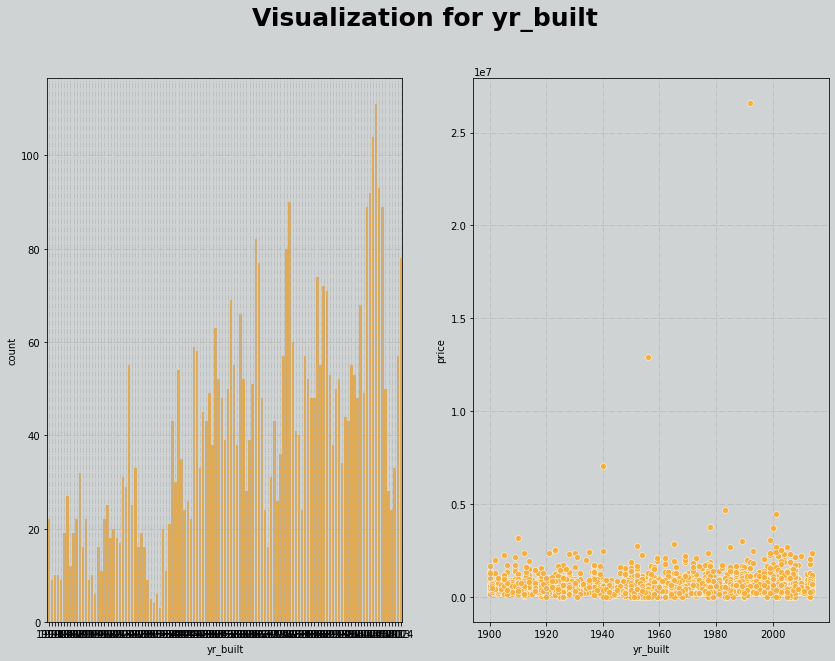

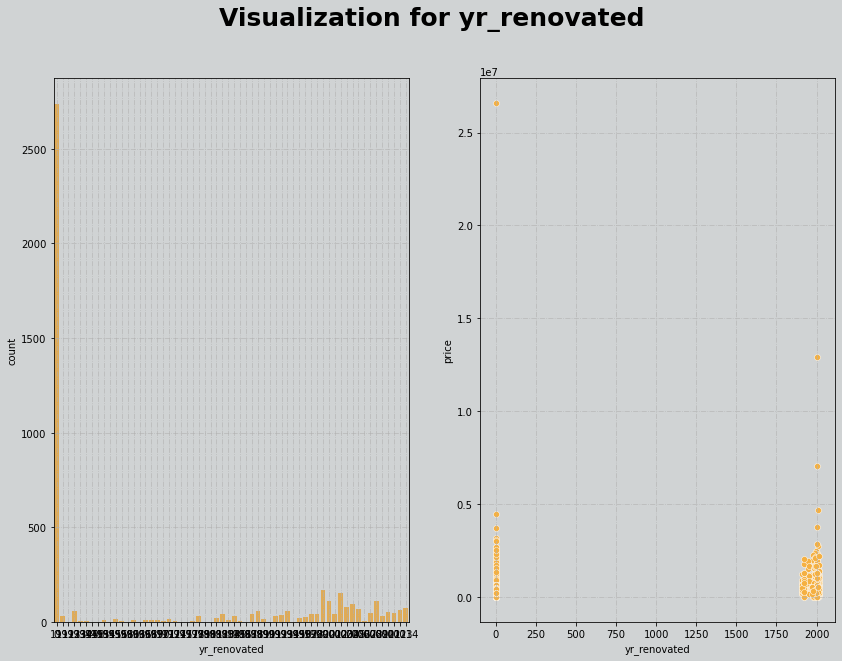

In [12]:
# iterate through all numerical cols
for column in numerical_cols:
    title = f"Visualization for {column}"
    create_figure(column, df, title)    

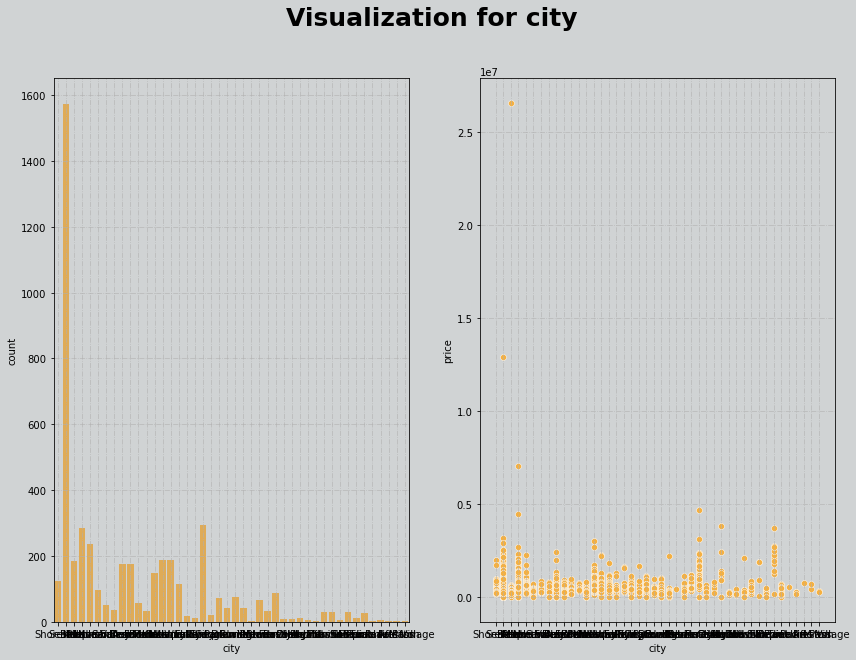

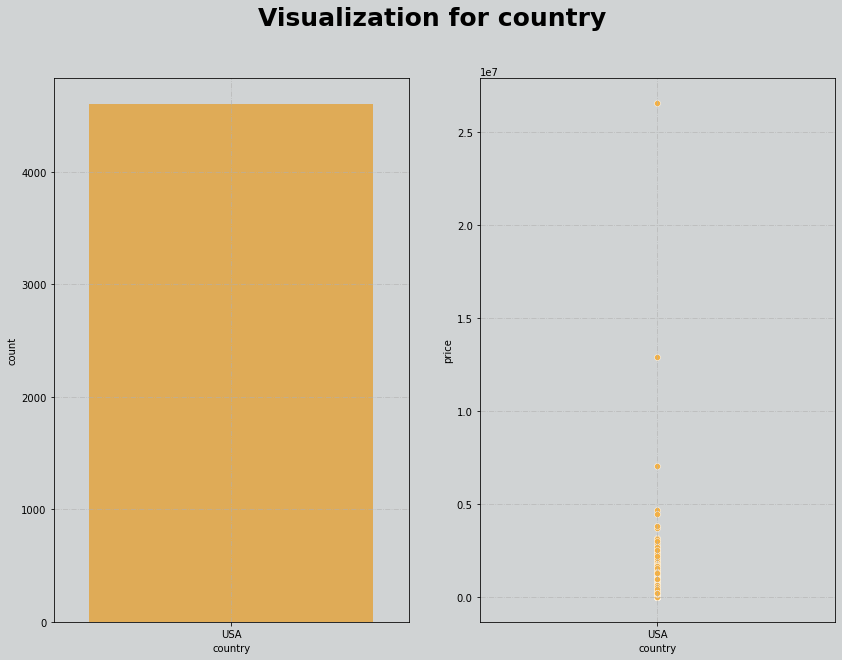

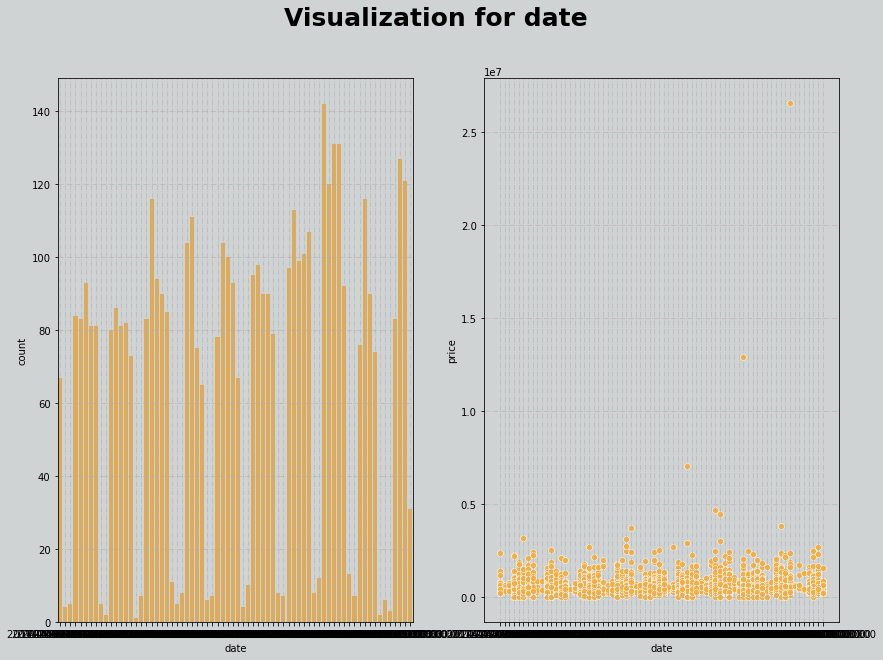

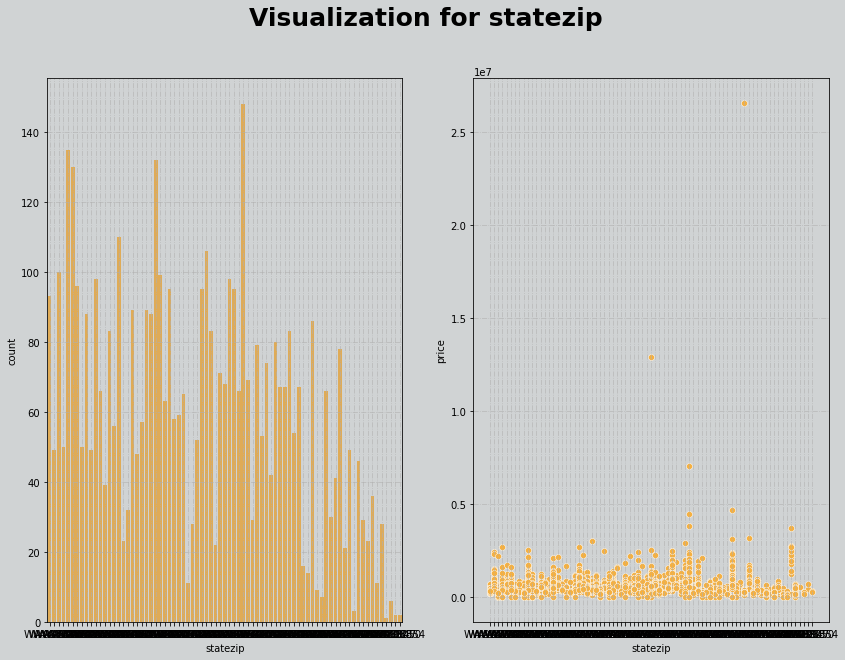

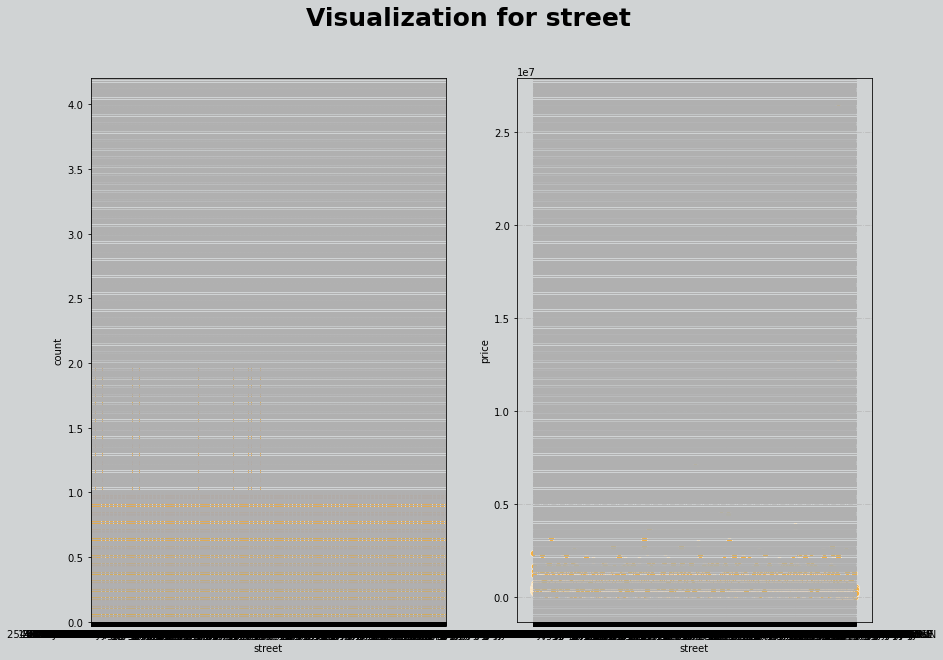

In [13]:
# iterate throuhg all the categorical cols
categorical_cols_dummies = pd.get_dummies(categorical_cols)

for column in categorical_cols_dummies:
    title = f"Visualization for {column}"
    create_figure(column, df, title)

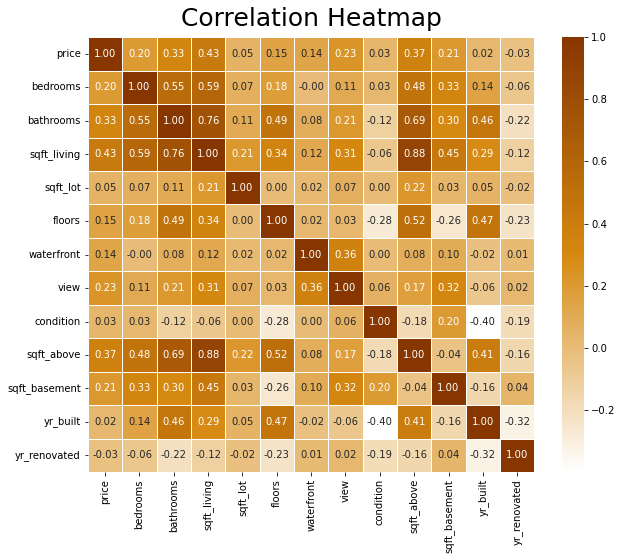

In [14]:
import matplotlib.colors as mcolors

corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))

# Define the colormap using LinearSegmentedColormap
colors = ["white", "#D68910", "#873600"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, ax=ax)

ax.set_title("Correlation Heatmap", fontsize=25, va="bottom")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

## Build the Model 

In [15]:
# load dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [16]:
features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement",
            "yr_renovated", "city"] 
X = df[features]
X.shape

(4600, 9)

In [17]:
y = df["price"]
y.shape

(4600,)

### Build the Pipeline


In [18]:
def fit_evaluate_model(model, X, y):
    
    # split data 
    X_train, X_valid, y_train, y_valid = train_test_split(X, y,  train_size=0.8, random_state=0)
    
    numerical_cols = X.select_dtypes(["int", "float"]).columns
    categorical_cols = X.select_dtypes("object").columns
    
    # Columntranformer
    numerical_transformer = Pipeline(steps=[
        ("Imputer", SimpleImputer(strategy="mean")),
        ("Scaler", StandardScaler(with_mean=True))        
    ])
    
    categorical_transformer = Pipeline(steps=[
        ("Imputer", SimpleImputer(strategy="most_frequent")),
        ("Encoder", OneHotEncoder())        
    ])
    
    preprocessor = ColumnTransformer(transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)        
    ])
     
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model())
    ])
    
    # fit evaluate the model 
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_valid)
    
    # get the  scores
    mae = mean_absolute_error(y_valid, y_pred)
    
    r2 = r2_score(y_valid, y_pred)
    
    scores_list = []
    
    scores_list.append((mae, r2))
    
    for i, (mae, r2) in enumerate(scores_list):
        print(f"{model} scores - MAE: {mae}, R2: {r2}")


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Create a list of regression models
models = [
    LinearRegression,
    DecisionTreeRegressor,
    RandomForestRegressor,
    KNeighborsRegressor,
    SVR,
    MLPRegressor,
    GradientBoostingRegressor,
    XGBRegressor,
    LGBMRegressor
]

In [20]:
for model in models:
    fit_evaluate_model(model, X, y)

<class 'sklearn.linear_model._base.LinearRegression'> scores - MAE: 137179.95215763416, R2: 0.6292031535169378
<class 'sklearn.tree._classes.DecisionTreeRegressor'> scores - MAE: 201516.3014832891, R2: -0.8299988953439292
<class 'sklearn.ensemble._forest.RandomForestRegressor'> scores - MAE: 145214.59278011363, R2: 0.37731172586164774
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> scores - MAE: 159305.4101302859, R2: 0.34641807412699066
<class 'sklearn.svm._classes.SVR'> scores - MAE: 231362.78718974674, R2: -0.06703131711563715
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> scores - MAE: 551778.797932228, R2: -2.0414970065664586
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> scores - MAE: 140156.13823621956, R2: 0.5979474966872729
<class 'xgboost.sklearn.XGBRegressor'> scores - MAE: 149828.2107316242, R2: 0.3575748022120918
<class 'lightgbm.sklearn.LGBMRegressor'> scores - MAE: 160176.25260814247, R2: 0.4225201238152816
